# Flight Delays Project

### Presented by the Air Marshalls

In [3]:
# importing libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import linregress
import requests
import gmaps

# Import API key
#from api_keys import g_key

# Specifying path
path = "C:/Users/chadi/Documents/GitHub/The_Air_Marshalls/flights.csv"
names_path = "C:/Users/chadi/Documents/GitHub/The_Air_Marshalls/airlines.csv"

#creating dataframe from excel file
flights = pd.read_csv(path, low_memory=False)
names = pd.read_csv(names_path)

df = pd.merge(flights, names, how="left", left_on=["AIRLINE"], right_on=["IATA_CODE"])

# display dataframe
df.rename(columns={"AIRLINE_x": "AIRLINE", "AIRLINE_y": "AIRLINE_NAME"}, inplace=True)
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,IATA_CODE,AIRLINE_NAME
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,AS,Alaska Airlines Inc.
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,AA,American Airlines Inc.
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,US,US Airways Inc.
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,AA,American Airlines Inc.
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,AS,Alaska Airlines Inc.


# Basic Info

In [4]:
#Basic info on Delays per airline

#Dataframe grouped by Airline
adf = df.groupby('AIRLINE')

#creating the values for initial view
mean = adf['DEPARTURE_DELAY'].mean()
median = adf['DEPARTURE_DELAY'].median()
var = adf['DEPARTURE_DELAY'].var()
std = adf['DEPARTURE_DELAY'].std()
sem = adf['DEPARTURE_DELAY'].sem()

#creating dataframe
sinfo = pd.DataFrame({
    'Mean': mean,
    'Median': median,
    'Variance': var,
    'Standard Deviation': std,
    'Standard Error of Mean': sem
})

#setting all floats to 2 decimal points
pd.options.display.float_format = '{:,.2f}'.format

#display dataframe for general info on delays
sinfo

,Mean,Median,Variance,Standard Deviation,Standard Error of Mean
AIRLINE,,,,,
AA,8.90,-2.00,"1,755.39",41.90,0.05
AS,1.79,-4.00,695.14,26.37,0.06
B6,11.51,-2.00,"1,483.63",38.52,0.08
DL,7.37,-1.00,"1,320.41",36.34,0.04
EV,8.72,-3.00,"1,496.16",38.68,0.05
F9,13.35,-2.00,"2,451.33",49.51,0.16
HA,0.49,-4.00,602.73,24.55,0.09
MQ,10.13,-2.00,"1,649.60",40.62,0.08
NK,15.94,-1.00,"1,915.61",43.77,0.13


# Question 1: How does the overall flight volume vary by month in 2015?

In [52]:
fvbm = df.groupby('MONTH')
total_f = fvbm['FLIGHT_NUMBER'].count()
nfvb = pd.DataFrame({
    'Total Flights': total_f
})
nfvb

,Total Flights
MONTH,
1,469968
2,429191
3,504312
4,485151
5,496993
6,503897
7,520718
8,510536
9,464946


(428191.0, 521718.0)

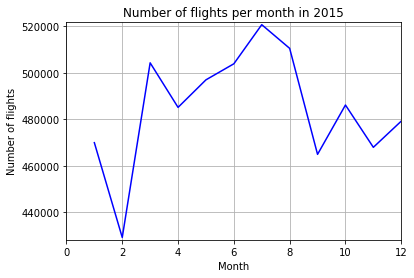

In [53]:
#How does the overall flight volume vary by month in 2015
#plot the line chart
plt.plot(df['MONTH'].value_counts().sort_index(), color="blue")
#add labels
plt.title("Number of flights per month in 2015")
plt.xlabel("Month")
plt.ylabel("Number of flights")
#add grid for reader to easier visulaize chart
plt.grid()
#setting limits for x and yl
plt.xlim(0,max(df['MONTH'].unique()))
plt.ylim(int(min(df['MONTH'].value_counts()))-1000,int(max(df['MONTH'].value_counts()))+1000)

# Question 2: What percentage of flights experienced a departure delay in 2015? Among those flights, what was the average delay time, in minutes?

In [16]:
#Departure Delays in the US
total_flights = len(df)
dep_delays = df.loc[df["DEPARTURE_DELAY"]>0]

total_dep_delays = len(dep_delays)
per_dep_delay = total_dep_delays / total_flights * 100

av_delay = sum(dep_delays["DEPARTURE_DELAY"]) / total_dep_delays

print(f"In 2015, {per_dep_delay:.2f}% of flights were delayed in the US.")
print(f"The average delay time for these flights was {av_delay:.0f} minutes.")

In 2015, 36.53% of flights were delayed in the US.
The average delay time for these flights was 33 minutes.


In [17]:
#Departure Delays by airline
airline_delays = dep_delays["AIRLINE_NAME"].value_counts().sort_index(ascending=True)
airline_flights = df["AIRLINE_NAME"].value_counts().sort_index(ascending=True)
per_airline_delays = airline_delays / airline_flights * 100
tot_airline_delay = dep_delays.groupby("AIRLINE_NAME")["DEPARTURE_DELAY"].sum()
av_airline_delay = tot_airline_delay / airline_delays

delays_df = pd.DataFrame({"Total Flights": airline_flights,
                          "Total Departure Delays": airline_delays,
                          "% Departure Delays": per_airline_delays,
                          "Average Delay Time (mins)": av_airline_delay})
delays_df.index.name = "Airline"
delays_df.style.format({"% Departure Delays": "{:,.2f}%", "Average Delay Time (mins)": "{:,.0f}"})

,Total Flights,Total Departure Delays,% Departure Delays,Average Delay Time (mins)
Airline,,,,
Alaska Airlines Inc.,172521,43566,25.25%,26
American Airlines Inc.,725984,245904,33.87%,34
American Eagle Airlines Inc.,294632,93726,31.81%,40
Atlantic Southeast Airlines,571977,169897,29.70%,41
Delta Air Lines Inc.,875881,282463,32.25%,30
Frontier Airlines Inc.,90836,34893,38.41%,45
Hawaiian Airlines Inc.,76272,20146,26.41%,17
JetBlue Airways,267048,102061,38.22%,38
Skywest Airlines Inc.,588353,171572,29.16%,39


# Question 3: How does the delayed flights % vary throughout the year (monthly)?

In [54]:
# creating a df for DEPATURE_DELAY
dd = df.loc[df['DEPARTURE_DELAY'] > 0]
# count of Departure_Delay
tot_delayed_f = len(dd)
# grouping months 
months = dd.groupby('MONTH')
# total number of all DEPATURES
monthly_delays = months['DEPARTURE_DELAY'].count()
total_flights = df['MONTH'].value_counts()
# creating a dataframe
average = monthly_delays/total_flights *100

monthly_dd = pd.DataFrame({'Total Flights':total_flights, 'Total Departure Delays':monthly_delays, '% Departure Delays': average})
monthly_dd

,Total Flights,Total Departure Delays,% Departure Delays
1,469968,176627,37.58
2,429191,173442,40.41
3,504312,193817,38.43
4,485151,167314,34.49
5,496993,178856,35.99
6,503897,215381,42.74
7,520718,209619,40.26
8,510536,190840,37.38
9,464946,132591,28.52
10,486165,145102,29.85


(26.5175052586752, 44.74306058579432)

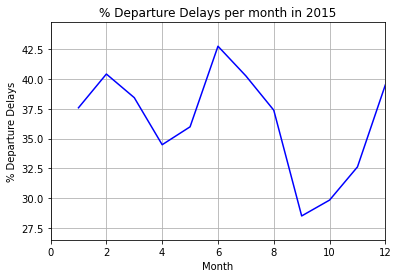

In [55]:
plt.plot(monthly_dd, color="blue")
# add some details
plt.title("% Departure Delays per month in 2015")
plt.xlabel("Month")
plt.ylabel("% Departure Delays")
#adding grid for reading precision
plt.grid()
# setting limits for x and y for optimal visual
plt.xlim(0,len(monthly_dd)) 
plt.ylim(min(monthly_dd['% Departure Delays'])-2, max(monthly_dd['% Departure Delays'])+2)

# Question 4: What are the top 5 busiest origin airports in 2015? And what are the top 5 origin airports with the highest departure and arrival delays?

In [9]:
# What are the top 5 busiest origin airports in 2015? 

trim_df = df[['ORIGIN_AIRPORT','DEPARTURE_DELAY','ARRIVAL_DELAY','CANCELLED']]
busy_df = trim_df.groupby(['ORIGIN_AIRPORT']).size().reset_index(name='No of Flights')

busy_df = busy_df.sort_values(by="No of Flights", ascending=False)
top_busy_df = busy_df.head(5)
top_busy_df

,ORIGIN_AIRPORT,No of Flights
326,ATL,346836
534,ORD,285884
392,DFW,239551
391,DEN,196055
482,LAX,194673


Text(0.5, 1.0, 'Top 5 busiest origin airports in 2015')

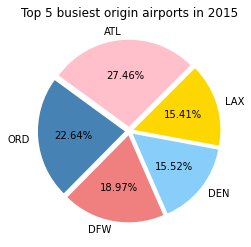

In [10]:
AIRPORT = ['ATL','ORD','DFW','DEN','LAX']
count = ['346836','285884','239551', '196055', '194673']
colors = ['pink', 'steelblue','lightcoral', 'lightskyblue', 'gold']
explode = (0.05, 0.05, 0.05, 0.05, 0.05)
plt.pie(count, labels=AIRPORT, colors=colors,
        startangle=45, explode=explode, autopct='%1.2f%%' )
plt.title('Top 5 busiest origin airports in 2015')

In [11]:
# What are the top 5 origin airports with the highest departure delays?

delays_df = trim_df.groupby(['ORIGIN_AIRPORT'], as_index=False).sum()
delays_df.head()

dep_delay_df = delays_df.sort_values(by="DEPARTURE_DELAY", ascending=False)
dep_delay_df.head()

,ORIGIN_AIRPORT,DEPARTURE_DELAY,ARRIVAL_DELAY,CANCELLED
534,ORD,"3,930,516.00","2,378,583.00",8548
326,ATL,"3,216,786.00","1,046,585.00",2557
392,DFW,"2,693,801.00","1,609,675.00",6254
391,DEN,"2,297,099.00","1,390,156.00",2123
482,LAX,"2,054,876.00","1,098,914.00",2164


In [12]:
# What are the top 5 origin airports with the highest arrival delays?

arr_delay_df = delays_df.sort_values(by="ARRIVAL_DELAY", ascending=False)
arr_delay_df.head()

,ORIGIN_AIRPORT,DEPARTURE_DELAY,ARRIVAL_DELAY,CANCELLED
534,ORD,"3,930,516.00","2,378,583.00",8548
392,DFW,"2,693,801.00","1,609,675.00",6254
391,DEN,"2,297,099.00","1,390,156.00",2123
482,LAX,"2,054,876.00","1,098,914.00",2164
457,IAH,"1,675,156.00","1,062,611.00",2130


# Question 5: How many flights were cancelled every month for the top 5 origin airports?

In [13]:
# How many flights were cancelled every month for the top 5 origin airports?

c_df = df.groupby(['ORIGIN_AIRPORT','MONTH'], as_index=False).agg({'CANCELLED':'sum'})

cancelled_df = pd.merge(top_busy_df, c_df, how="left", on=["ORIGIN_AIRPORT", "ORIGIN_AIRPORT"])
clean_cancelled_df = cancelled_df.drop(columns = ['No of Flights'])

clean_cancelled_df.head(10)


,ORIGIN_AIRPORT,MONTH,CANCELLED
0,ATL,1,263
1,ATL,2,932
2,ATL,3,269
3,ATL,4,102
4,ATL,5,148
5,ATL,6,287
6,ATL,7,87
7,ATL,8,98
8,ATL,9,38
9,ATL,11,62


In [14]:
#pivot table for easy readability
clean_cancelled_df.pivot("ORIGIN_AIRPORT", "MONTH", "CANCELLED")

MONTH,1,2,3,4,5,6,7,8,9,11,12
ORIGIN_AIRPORT,,,,,,,,,,,
ATL,263,932,269,102,148,287,87,98,38,62,271
DEN,273,401,149,133,109,213,120,76,25,229,395
DFW,524,2000,1128,348,803,359,100,119,33,205,635
LAX,251,327,183,103,97,280,283,244,104,96,196
ORD,1118,1699,703,508,289,1223,482,563,284,809,870


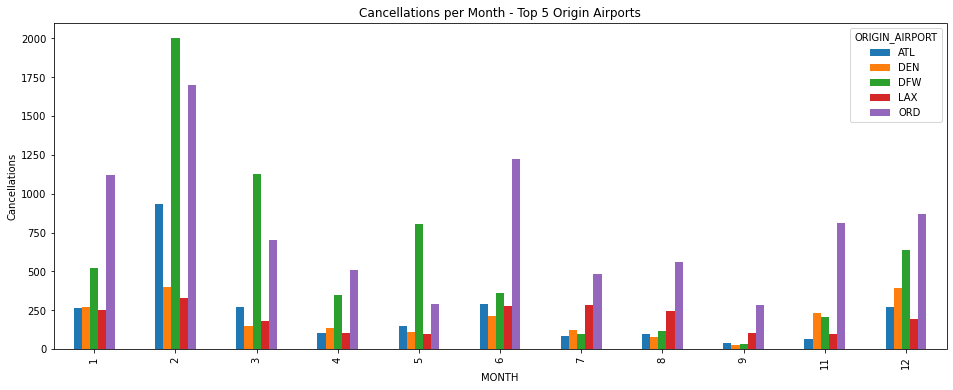

In [15]:
#create clustered bar chart for top 5 airports
clean_cancelled_df.pivot("MONTH", "ORIGIN_AIRPORT", "CANCELLED").plot(kind='bar', figsize=(16,6))
plt.title("Cancellations per Month - Top 5 Origin Airports")
plt.ylabel("Cancellations")
plt.show()

# Question 6: How many flights were cancelled in 2015? What % of cancellations were due to weather? What % were due to the Airline/Carrier fault?

In [5]:
# creating a df where it contains only cancelled flights
cdf = df.loc[df['CANCELLED'] == 1]
#getting the count
cfl = cdf['CANCELLED'].count()
#printing initial results
print(f'In 2015, {cfl} flights were cancelled.')
#grouping by month
ndf = cdf.groupby('MONTH')
#get the count of cancelled flights and total flights
cancelled = ndf['CANCELLED'].count()
tot = cdf['CANCELLED'].count()
#create a dataframe to display information
cncl = pd.DataFrame({
    'Number of Cancellations': cancelled,
    '% Cancellations': (cancelled/tot)*100
})
# display df created
cncl

In 2015, 89884 flights were cancelled.


,Number of Cancellations,% Cancellations
MONTH,,
1,11982,13.33
2,20517,22.83
3,11002,12.24
4,4520,5.03
5,5694,6.33
6,9120,10.15
7,4806,5.35
8,5052,5.62
9,2075,2.31


In [6]:
#create a df where cancellations are A and B only
cre = (df.loc[(df["CANCELLATION_REASON"] == "A") | (df["CANCELLATION_REASON"] == "B")])
#group by the reasons
edf = cre.groupby(['CANCELLATION_REASON'])
#get the count of the cancelled flights and the total count of flights
cancelled = edf['CANCELLED'].count()
tote = cdf['CANCELLED'].count()
#create a dataframe to display information
cncle = pd.DataFrame({
    'Number of Cancellations': cancelled,
    '% Cancellations': (cancelled/tot)*100
})
#display df created
cncle

,Number of Cancellations,% Cancellations
CANCELLATION_REASON,,
A,25262,28.11
B,48851,54.35


(2073.0, 20519.0)

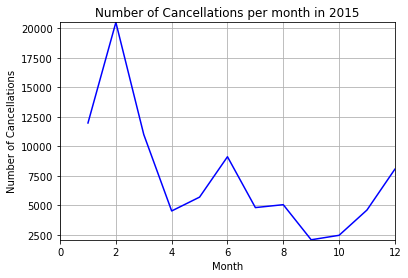

In [7]:
#plot the line chart
plt.plot(df['MONTH'].unique(), cncl["Number of Cancellations"], color="blue")
#add some details
plt.title(f"Number of Cancellations per month in 2015")
plt.xlabel("Month")
plt.ylabel("Number of Cancellations")
#adding grid for reading precision
plt.grid()
#setting limits for x and y for optimal visual
plt.xlim(0,max(df['MONTH'].unique()))
plt.ylim(int(min(cncl["Number of Cancellations"]))-2,int(max(cncl["Number of Cancellations"]))+2)

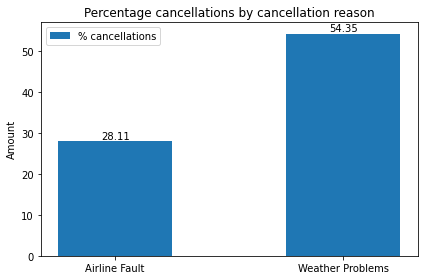

In [8]:
# creating x axis
x = np.arange(len(cre["CANCELLATION_REASON"].unique()))  # the label locations
width = 0.5 # will be used as column width
#plotting the bar chart
fig, ax = plt.subplots()
rects1 = ax.bar(x, cncle["% Cancellations"], width, label='% cancellations')
# Add some text for labels, title and custom x-axis tick labels
ax.set_ylabel('Amount')
ax.set_title('Percentage cancellations by cancellation reason')
ax.set_xticks(x)
ax.set_xticklabels(['Airline Fault', 'Weather Problems'])
#turning on legend after adding label
ax.legend()
# creating a function to add the numbers to the top of the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:,.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 0),
                    textcoords="offset points",
                    ha='center', va='bottom')
# running the functions
autolabel(rects1)
# fixing layout for optimal visualization
fig.tight_layout()

plt.show()

# Question 7: Which airlines seem to be most and least reliable, in terms of on-time departure in 2015?

In [48]:
# creating a df where it contains only delayed depature
cdd = df.loc[df['DEPARTURE_DELAY'] == 0]
#grouping by airline
gba = cdd.groupby('AIRLINE')
#get the count of depature delays
dd = gba['DEPARTURE_DELAY'].count()
#create a dataframe to display information
cdi = pd.DataFrame({
    'Number of On-Time Departures': dd
})
# display df created
cdi

,Number of On-Time Departures
AIRLINE,
AA,33655
AS,7091
B6,13622
DL,67133
EV,21804
F9,3253
HA,3132
MQ,15044
NK,4702


In [49]:
#top n
tpn = cdi.nlargest(3, 'Number of On-Time Departures')
tpn

,Number of On-Time Departures
AIRLINE,
WN,91539
DL,67133
AA,33655


In [50]:
#bottom n
btmn = cdi.nsmallest(3, 'Number of On-Time Departures')
btmn

,Number of On-Time Departures
AIRLINE,
HA,3132
F9,3253
VX,3883


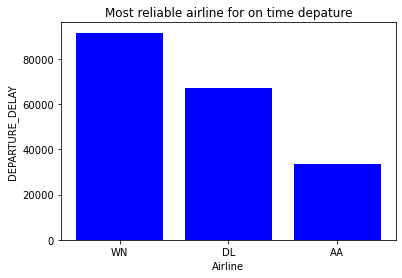

In [51]:
#Plot the data using bar() method
x_axis = np.arange(len(tpn['Number of On-Time Departures']))
plt.bar(x_axis, tpn['Number of On-Time Departures'], color='blue')
plt.title("Most reliable airline for on time depature")
plt.xlabel("Airline")
plt.ylabel("DEPARTURE_DELAY")
plt.xticks(x_axis,["WN", "DL", "AA"])

# Show the plot
plt.show()

,Total Flights,Total Departure Delays,% Departure Delays
1,469968,176627,37.58
2,429191,173442,40.41
3,504312,193817,38.43
4,485151,167314,34.49
5,496993,178856,35.99
6,503897,215381,42.74
7,520718,209619,40.26
8,510536,190840,37.38
9,464946,132591,28.52
10,486165,145102,29.85


(26.5175052586752, 44.74306058579432)

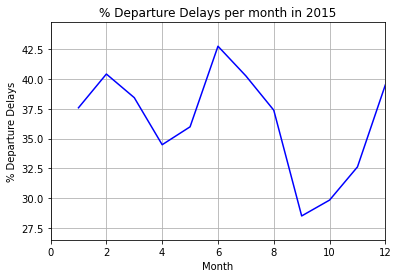

# Question 8: Which airlines on average depart before the set schedule in 2015?

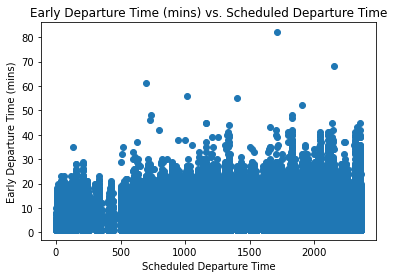

In [18]:
#Early Departures by Scheduled Departure Times
dep_early = df.loc[(df["DEPARTURE_DELAY"]<0), ["DEPARTURE_DELAY","SCHEDULED_DEPARTURE"]]
sch_dep = dep_early["SCHEDULED_DEPARTURE"]
dep_del = abs(dep_early["DEPARTURE_DELAY"])

plt.scatter(sch_dep, dep_del)
plt.title("Early Departure Time (mins) vs. Scheduled Departure Time")
plt.xlabel("Scheduled Departure Time")
plt.ylabel("Early Departure Time (mins)")

plt.show()

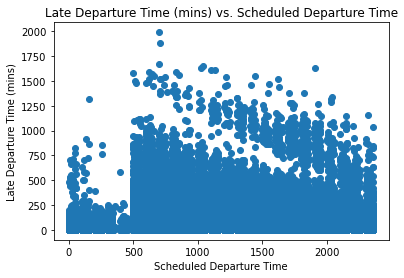

In [19]:
#Late Departures by Scheduled Departure Times
dep_late = df.loc[(df["DEPARTURE_DELAY"]>0), ["DEPARTURE_DELAY","SCHEDULED_DEPARTURE"]]
plt.scatter(dep_late["SCHEDULED_DEPARTURE"], dep_late["DEPARTURE_DELAY"])
plt.title("Late Departure Time (mins) vs. Scheduled Departure Time")
plt.xlabel("Scheduled Departure Time")
plt.ylabel("Late Departure Time (mins)")

plt.show()

The r-value is: 0.9490577226252708.


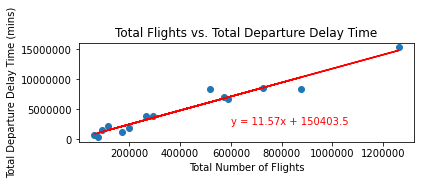

In [20]:
plt.subplot(2, 1, 1)
plt.scatter(airline_flights, tot_airline_delay)
plt.ticklabel_format(useOffset=False, style='plain')
plt.title("Total Flights vs. Total Departure Delay Time")
plt.xlabel("Total Number of Flights")
plt.ylabel("Total Departure Delay Time (mins)")

slope, intercept, rvalue, pvalue, stderr = linregress(airline_flights, tot_airline_delay)
fit = slope * airline_flights + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(airline_flights, fit, "r-")

plt.annotate(line_eq,(600000,2500000), fontsize=10, color="red")
print(f"The r-value is: {rvalue**2}.")

plt.show()

In [21]:
stats.ttest_ind(airline_flights, tot_airline_delay)

Ttest_indResult(statistic=-3.984606562582109, pvalue=0.00048664751688847423)

# Question 9: How does the distance of a trip have an influence (if any) on the arrival/departure delay of a flight?

In [28]:
# Calculate the average number of delays per airport.
avg_delays = df.groupby('AIRLINE')['ARRIVAL_DELAY'].sum().mean()

# Display average number of delays per airport.
print('Average Number of Delays per Airline: ' + str(avg_delays))

Average Number of Delays per Airline: 1798711.5


In [29]:
print ("Number of different Airlines:",df['AIRLINE'].nunique() )
print ("Airline Count",df['AIRLINE'].value_counts(), sep='\n')

Number of different Airlines: 14
Airline Count
WN    1261855
DL     875881
AA     725984
OO     588353
EV     571977
UA     515723
MQ     294632
B6     267048
US     198715
AS     172521
NK     117379
F9      90836
HA      76272
VX      61903
Name: AIRLINE, dtype: int64


In [30]:
# data.mean() and data.median()
print('Average Departure delay is ',df['DEPARTURE_DELAY'].mean(), 'and Median Departure delay is',df['DEPARTURE_DELAY'].median())
print('Average Arrival delay is ',df['ARRIVAL_DELAY'].mean(), 'and Median Arrival delay is',df['ARRIVAL_DELAY'].median())

Average Departure delay is  9.370158275198389 and Median Departure delay is -2.0
Average Arrival delay is  4.407057357987598 and Median Arrival delay is -5.0


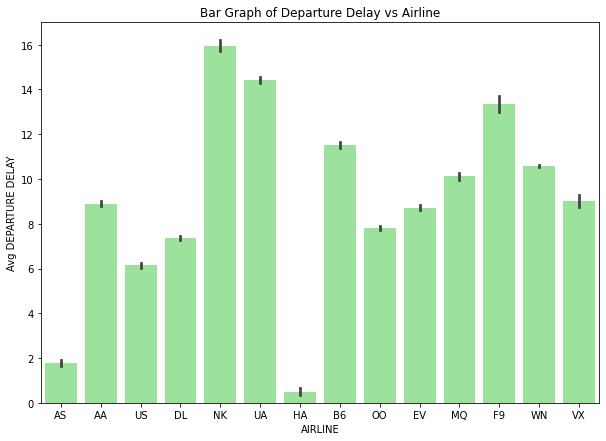

In [31]:
# Departure Delay vs Airline
fig = plt.figure(1, figsize=(10,7))
ax1 = sns.barplot(x="AIRLINE", y="DEPARTURE_DELAY", data=df , color="lightgreen")
plt.xlabel("AIRLINE")
plt.ylabel("Avg DEPARTURE DELAY")
plt.title("Bar Graph of Departure Delay vs Airline")
plt.show()

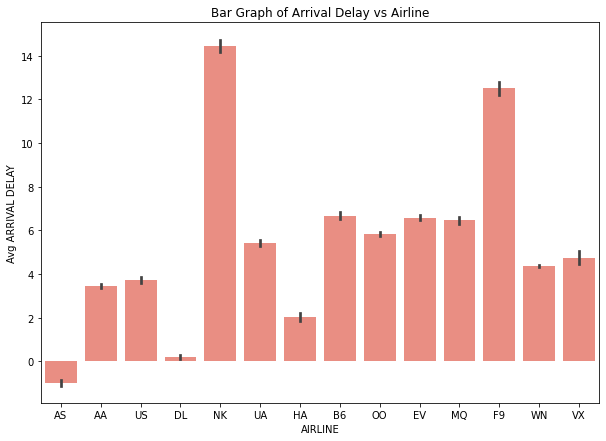

In [32]:
# Arrival Delay vs Airline
fig = plt.figure(1, figsize=(10,7))
ax2 = sns.barplot(x="AIRLINE", y="ARRIVAL_DELAY", data=df, color="salmon" )
plt.xlabel("AIRLINE")
plt.ylabel("Avg ARRIVAL DELAY")
plt.title("Bar Graph of Arrival Delay vs Airline")
plt.show()

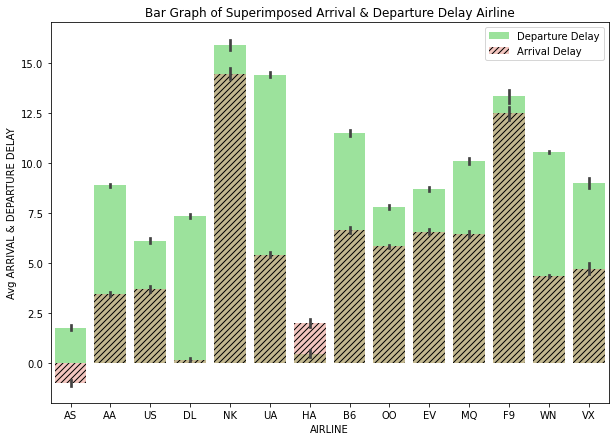

In [33]:
# superimposing both graphs to see difference
fig = plt.figure(1, figsize=(10,7))
labels = ['green','hatch']
ax3 = sns.barplot(y="DEPARTURE_DELAY", x="AIRLINE", data=df, color="lightgreen", label = 'Departure Delay')
ax3 = sns.barplot(y="ARRIVAL_DELAY", x="AIRLINE", data=df, color="salmon", hatch = '////',alpha = 0.5, label = 'Arrival Delay')


plt.xlabel("AIRLINE")
plt.ylabel("Avg ARRIVAL & DEPARTURE DELAY")
plt.title("Bar Graph of Superimposed Arrival & Departure Delay Airline")
plt.legend()
plt.show()

In [34]:
# describe to print 5 number summary
# descending order of median = 50%
Dep_Delay = df.groupby('AIRLINE')['DEPARTURE_DELAY'].describe()[['max', '75%','50%','25%', 'min']]
print("Departure Delay",Dep_Delay.sort_values(by='50%',ascending=False), sep='\n')

Arvl_Delay = df.groupby('AIRLINE')['ARRIVAL_DELAY'].describe()[['max', '75%','50%','25%', 'min']]
print("Arrival Delay",Arvl_Delay.sort_values(by='50%',ascending=False), sep='\n')

Departure Delay
             max   75%   50%   25%    min
AIRLINE                                  
UA      1,314.00 13.00  1.00 -4.00 -40.00
WN        665.00 11.00  0.00 -3.00 -28.00
DL      1,289.00  4.00 -1.00 -4.00 -61.00
NK        836.00 18.00 -1.00 -5.00 -37.00
VX        644.00  7.00 -1.00 -4.00 -24.00
AA      1,988.00  5.00 -2.00 -5.00 -68.00
B6      1,006.00 11.00 -2.00 -5.00 -31.00
F9      1,112.00 12.00 -2.00 -7.00 -46.00
MQ      1,544.00  8.00 -2.00 -6.00 -36.00
US        759.00  4.00 -2.00 -5.00 -35.00
EV      1,274.00  4.00 -3.00 -6.00 -55.00
OO      1,378.00  4.00 -3.00 -6.00 -56.00
AS        963.00  1.00 -4.00 -8.00 -82.00
HA      1,433.00  1.00 -4.00 -7.00 -27.00
Arrival Delay
             max   75%   50%    25%    min
AIRLINE                                   
NK        833.00 20.00  0.00 -10.00 -60.00
F9      1,101.00 16.00 -1.00 -11.00 -73.00
HA      1,467.00  5.00 -2.00  -6.00 -67.00
VX        651.00  9.00 -3.00 -12.00 -81.00
EV      1,223.00  9.00 -4.00 -12.00 -64.

In [35]:
Distance_corr = df[['DISTANCE', 'DEPARTURE_DELAY','ARRIVAL_DELAY']]
Distance_corr.corr()

,DISTANCE,DEPARTURE_DELAY,ARRIVAL_DELAY
DISTANCE,1.00,0.02,-0.03
DEPARTURE_DELAY,0.02,1.00,0.94
ARRIVAL_DELAY,-0.03,0.94,1.00


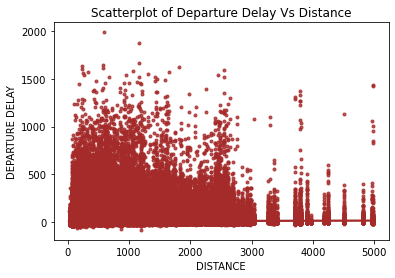

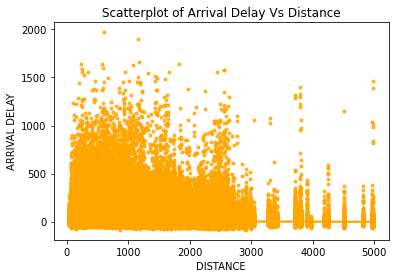

In [36]:
# scatter plot with regression line

scatter, ax = plt.subplots()
ax = sns.regplot(x = 'DISTANCE', y = 'DEPARTURE_DELAY', data = df, color = "brown",marker = '.' )

ax.set_title('Scatterplot of Departure Delay Vs Distance')
ax.set_xlabel('DISTANCE')
ax.set_ylabel('DEPARTURE DELAY')

plt.show()

# scatter plot with regression line
scatter, ax = plt.subplots()
ax = sns.regplot(x = 'DISTANCE', y = 'ARRIVAL_DELAY', data = df, color = "orange", marker = '.')

ax.set_title('Scatterplot of Arrival Delay Vs Distance')
ax.set_xlabel('DISTANCE')
ax.set_ylabel('ARRIVAL DELAY')

plt.show()

# Plotting Info with gmaps

In [40]:
# Specifying path
air_path = "C:/Users/chadi/Documents/GitHub/The_Air_Marshalls/airports.csv"

#creating dataframe from excel file
airports_csv = pd.read_csv(air_path)

#remove empty data rows
for index, row in airports_csv.iterrows():
    if(np.isnan(row['LATITUDE']) or np.isnan(row['LONGITUDE']) ):
        airports_csv.drop(index, inplace=True)

#add airport volume to dataframe
airports = pd.merge(airports_csv, busy_df, how="left", left_on=["IATA_CODE"], right_on=["ORIGIN_AIRPORT"])

    
# display dataframe
airports


,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE,ORIGIN_AIRPORT,No of Flights
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65,-75.44,ABE,2274
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41,-99.68,ABI,2329
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04,-106.61,ABQ,19192
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.45,-98.42,ABR,671
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.54,-84.19,ABY,876
...,...,...,...,...,...,...,...,...,...
314,WRG,Wrangell Airport,Wrangell,AK,USA,56.48,-132.37,WRG,664
315,WYS,Westerly State Airport,West Yellowstone,MT,USA,44.69,-111.12,WYS,208
316,XNA,Northwest Arkansas Regional Airport,Fayetteville/Springdale/Rogers,AR,USA,36.28,-94.31,XNA,9283
317,YAK,Yakutat Airport,Yakutat,AK,USA,59.50,-139.66,YAK,662


In [24]:
gmaps.configure(api_key=g_key)

heat_layout = {
    'width': '900px',
    'height': '450px',
    'border': '2px solid black',
    'padding': '2px',
    'margin': '0 auto 0 auto'
}

fig = gmaps.figure(layout=heat_layout,center=(40.0, -100.0), zoom_level=2)

locations = airports[['LATITUDE', 'LONGITUDE']].astype(float)
volume = airports["No of Flights"].astype(float)

fig.add_layer(gmaps.heatmap_layer(locations, 
                                  weights=volume,
                                  dissipating=False, 
                                  max_intensity=max(volume), 
                                  point_radius=3))
fig

NameError: name 'g_key' is not defined

In [25]:
# Using the template add the airport marks to the heatmap
info_box_template = """
<dl>
<dt>Airport Name</dt><dd>{AIRPORT}</dd>
<dt>City</dt><dd>{CITY}</dd>
<dt>Country</dt><dd>{COUNTRY}</dd>
</dl>
"""
# Store the DataFrame Row
airports_info = [info_box_template.format(**row) for index, row in airports.iterrows()]
locations = airports[['LATITUDE', 'LONGITUDE']]

# Add marker layer ontop of heat map
markers = gmaps.marker_layer(locations, info_box_content = airports_info)

# Display figure
fig.add_layer(markers)
fig

AttributeError: 'Figure' object has no attribute 'add_layer'